# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output_layer")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [9]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr = lr, nesterov = True, momentum = MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics = ["accuracy"], optimizer = optimizer)
    
    model.fit(x_train, y_train,
              epochs = EPOCHS,
              batch_size = BATCH_SIZE,
              validation_data = (x_test, y_test),
              shuffle = True)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = 'exp-lr-%s' % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Epoch 1/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.8272 - acc: 0.3464 - val_loss: 1.6549 - val_acc: 0.4155
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6033 - acc: 0.4349 - val_loss: 1.5458 - val_acc: 0.4517
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5087 - acc: 0.4643 - val_loss: 1.5372 - val_acc: 0.4596
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.4496 - acc: 0.4867 - val_loss: 1.5185 - val_acc: 0.4565
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4082 - acc: 0.5010 - val_loss: 1.5169 - val_acc: 0.4693
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.3624 - acc: 0.5165 - val_loss: 1.4857 - val_acc: 0.4661
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3339 - acc: 0.5261 - val_loss: 1.3999 - val_acc: 0.4996
Epoch 8/50
50000/50000 [=================

50000/50000 [==============================] - 2s 39us/step - loss: 1.8112 - acc: 0.3616 - val_loss: 1.7630 - val_acc: 0.3870
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7295 - acc: 0.3928 - val_loss: 1.7037 - val_acc: 0.3973
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6676 - acc: 0.4144 - val_loss: 1.6511 - val_acc: 0.4204
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6190 - acc: 0.4322 - val_loss: 1.6068 - val_acc: 0.4317
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5802 - acc: 0.4457 - val_loss: 1.5703 - val_acc: 0.4465
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5450 - acc: 0.4590 - val_loss: 1.5549 - val_acc: 0.4505
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5168 - acc: 0.4692 - val_loss: 1.5219 - val_acc: 0.4653
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9956 - acc: 0.2989 - val_loss: 1.9725 - val_acc: 0.3144
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9529 - acc: 0.3175 - val_loss: 1.9357 - val_acc: 0.3270
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9214 - acc: 0.3304 - val_loss: 1.9084 - val_acc: 0.3371
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8958 - acc: 0.3394 - val_loss: 1.8862 - val_acc: 0.3439
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8748 - acc: 0.3476 - val_loss: 1.8668 - val_acc: 0.3521
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8570 - acc: 0.3540 - val_loss: 1.8507 - val_acc: 0.3544
Epoch 10/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8406 - acc: 0.3590 - val_loss: 1.8361 - val_acc: 0.3621
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 2s 39us/step - loss: 2.2316 - acc: 0.1965 - val_loss: 2.2248 - val_acc: 0.2088
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.2179 - acc: 0.2058 - val_loss: 2.2119 - val_acc: 0.2180
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2053 - acc: 0.2152 - val_loss: 2.1999 - val_acc: 0.2234
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1934 - acc: 0.2206 - val_loss: 2.1885 - val_acc: 0.2283
Epoch 9/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1822 - acc: 0.2249 - val_loss: 2.1777 - val_acc: 0.2338
Epoch 10/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1716 - acc: 0.2315 - val_loss: 2.1674 - val_acc: 0.2386
Epoch 11/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1615 - acc: 0.2346 - val_loss: 2.1575 - val_acc: 0.2411
Epoch 12/50
50000/50000 [=========================

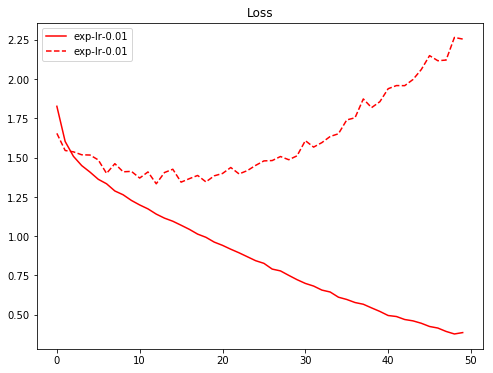

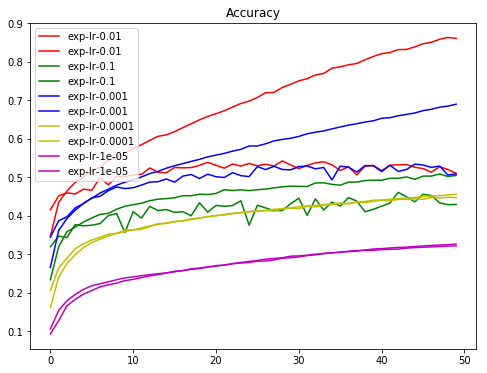

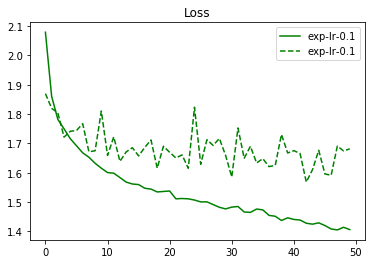

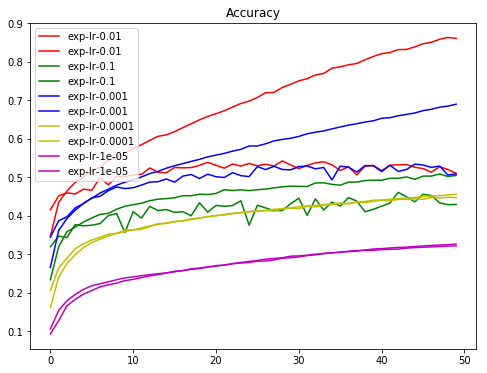

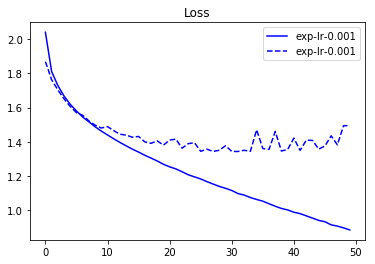

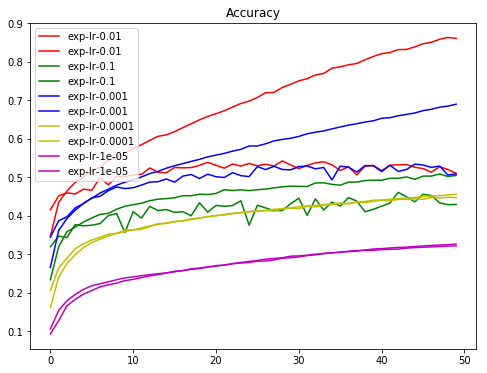

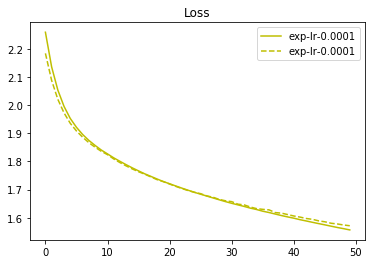

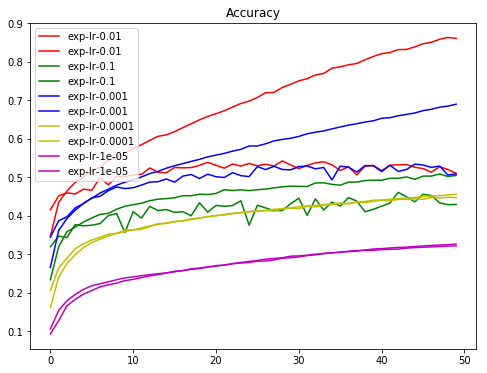

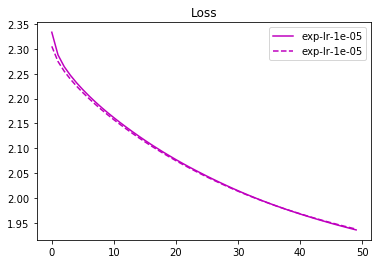

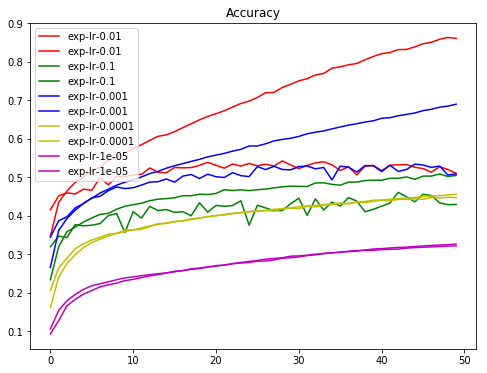

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label = cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '-', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

# RMSProp

In [13]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr = lr)
    model.compile(loss="categorical_crossentropy", metrics = ["accuracy"], optimizer = optimizer)
    
    model.fit(x_train, y_train,
              epochs = EPOCHS,
              batch_size = BATCH_SIZE,
              validation_data = (x_test, y_test),
              shuffle = True)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = 'exp-lr-%s' % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 51us/step - loss: 14.4431 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 2s 47us/step - loss: 2.3815 - acc: 0.2153 - val_loss: 2.0293 - val_acc: 0.2619
Epoch 2/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.8880 - acc: 0.3193 - val_loss: 1.8633 - val_acc: 0.3281
Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7878 - acc: 0.3573 - val_loss: 1.6887 - val_acc: 0.3987
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7105 - acc: 0.3884 - val_loss: 1.6982 - val_acc: 0.3894
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6525 - acc: 0.4073 - val_loss: 1.6561 - val_acc: 0.4017
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6066 - acc: 0.4263 - val_loss: 1.5953 - val_acc: 0.4253
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5713 - acc: 0.4387 - val_loss: 1.5383 - val_acc: 0.4518
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7103 - acc: 0.3926 - val_loss: 1.7070 - val_acc: 0.3798
Epoch 4/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6562 - acc: 0.4117 - val_loss: 1.6573 - val_acc: 0.4153
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6128 - acc: 0.4314 - val_loss: 1.6718 - val_acc: 0.4006
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5767 - acc: 0.4421 - val_loss: 1.6001 - val_acc: 0.4381
Epoch 7/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5454 - acc: 0.4563 - val_loss: 1.5499 - val_acc: 0.4499
Epoch 8/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5155 - acc: 0.4642 - val_loss: 1.6041 - val_acc: 0.4230
Epoch 9/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4903 - acc: 0.4737 - val_loss: 1.5096 - val_acc: 0.4661
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 2s 42us/step - loss: 1.8274 - acc: 0.3652 - val_loss: 1.8101 - val_acc: 0.3628
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7940 - acc: 0.3760 - val_loss: 1.7871 - val_acc: 0.3711
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7663 - acc: 0.3852 - val_loss: 1.7644 - val_acc: 0.3787
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7434 - acc: 0.3921 - val_loss: 1.7453 - val_acc: 0.3906
Epoch 8/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7248 - acc: 0.4009 - val_loss: 1.7255 - val_acc: 0.3986
Epoch 9/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7069 - acc: 0.4071 - val_loss: 1.7262 - val_acc: 0.3935
Epoch 10/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6914 - acc: 0.4131 - val_loss: 1.6933 - val_acc: 0.4026
Epoch 11/50
50000/50000 [==========================

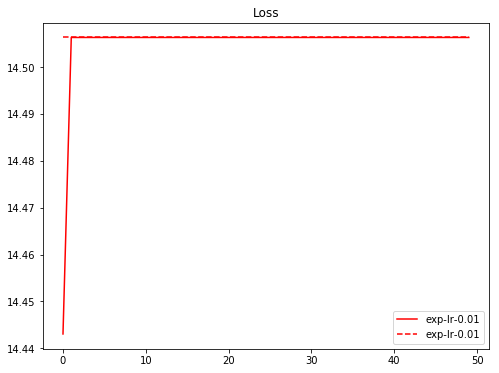

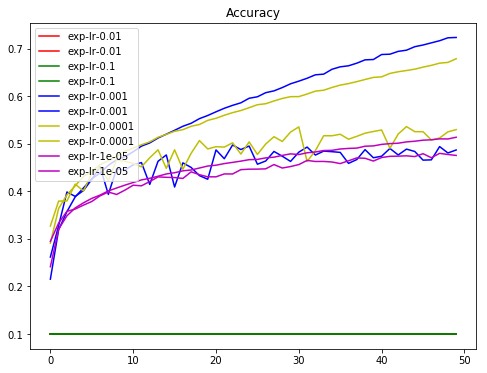

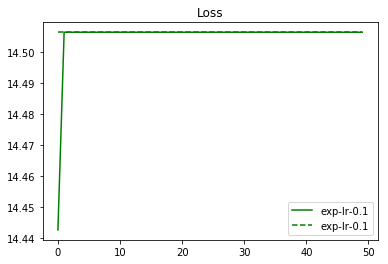

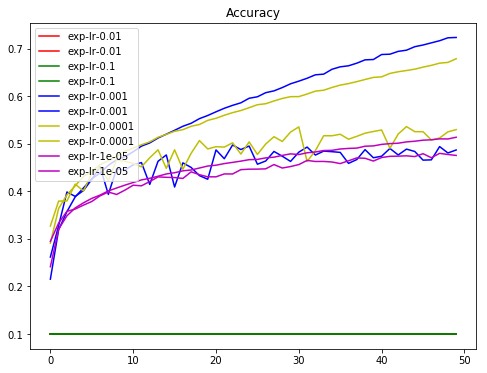

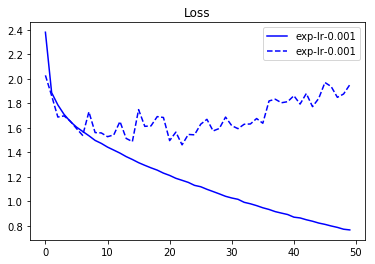

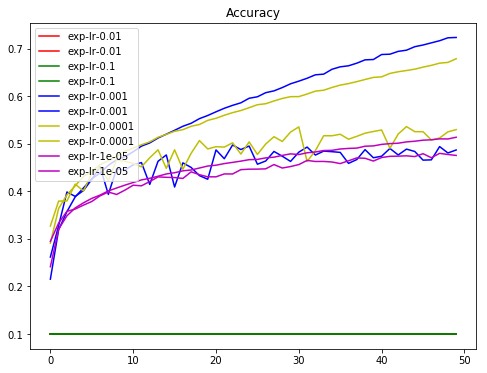

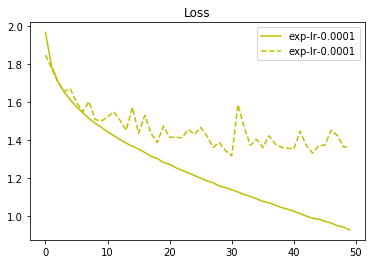

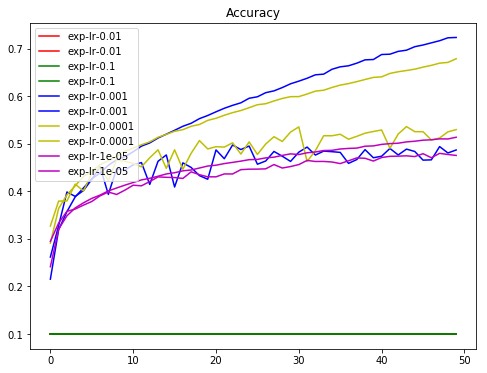

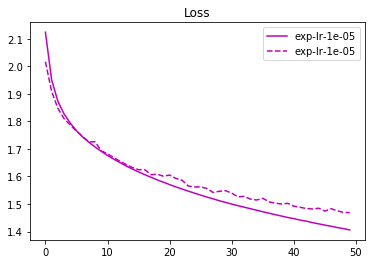

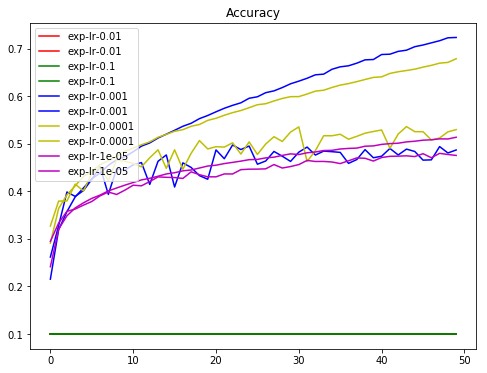

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label = cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '-', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

# AdaGrad

In [15]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr = lr)
    model.compile(loss="categorical_crossentropy", metrics = ["accuracy"], optimizer = optimizer)
    
    model.fit(x_train, y_train,
              epochs = EPOCHS,
              batch_size = BATCH_SIZE,
              validation_data = (x_test, y_test),
              shuffle = True)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = 'exp-lr-%s' % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.4472 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.4931 - acc: 0.1005 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 3s 52us/step - loss: 2.0029 - acc: 0.2822 - val_loss: 1.9137 - val_acc: 0.3115
Epoch 2/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.8105 - acc: 0.3608 - val_loss: 1.7889 - val_acc: 0.3572
Epoch 3/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7340 - acc: 0.3894 - val_loss: 1.7332 - val_acc: 0.3759
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6817 - acc: 0.4120 - val_loss: 1.7072 - val_acc: 0.3931
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6453 - acc: 0.4234 - val_loss: 1.6381 - val_acc: 0.4281
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6149 - acc: 0.4349 - val_loss: 1.6349 - val_acc: 0.4240
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5887 - acc: 0.4461 - val_loss: 1.6074 - val_acc: 0.4307
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.8827 - acc: 0.3464 - val_loss: 1.8683 - val_acc: 0.3520
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.8546 - acc: 0.3590 - val_loss: 1.8498 - val_acc: 0.3625
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.8342 - acc: 0.3655 - val_loss: 1.8254 - val_acc: 0.3721
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.8180 - acc: 0.3719 - val_loss: 1.8120 - val_acc: 0.3776
Epoch 7/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.8047 - acc: 0.3765 - val_loss: 1.8003 - val_acc: 0.3811
Epoch 8/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7932 - acc: 0.3802 - val_loss: 1.7902 - val_acc: 0.3821
Epoch 9/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7836 - acc: 0.3828 - val_loss: 1.7823 - val_acc: 0.3850
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 2s 42us/step - loss: 2.1769 - acc: 0.2386 - val_loss: 2.1671 - val_acc: 0.2462
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1604 - acc: 0.2483 - val_loss: 2.1519 - val_acc: 0.2511
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1464 - acc: 0.2536 - val_loss: 2.1389 - val_acc: 0.2567
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.1343 - acc: 0.2574 - val_loss: 2.1274 - val_acc: 0.2604
Epoch 8/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.1235 - acc: 0.2602 - val_loss: 2.1173 - val_acc: 0.2638
Epoch 9/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.1140 - acc: 0.2643 - val_loss: 2.1082 - val_acc: 0.2665
Epoch 10/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1054 - acc: 0.2670 - val_loss: 2.1001 - val_acc: 0.2691
Epoch 11/50
50000/50000 [==========================

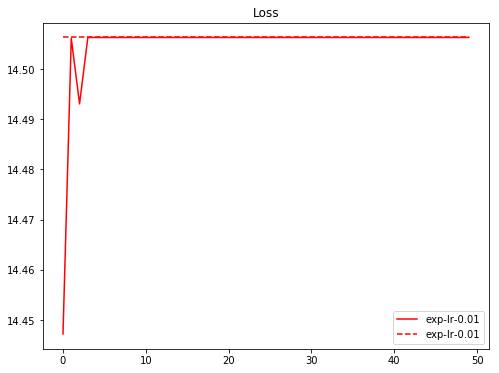

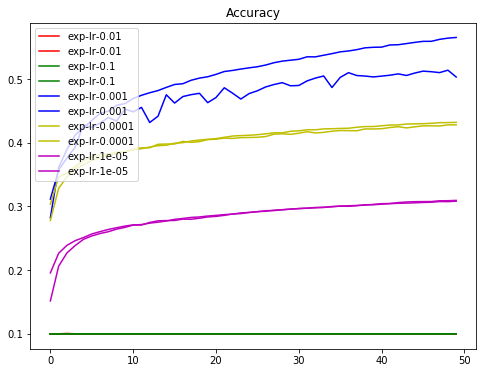

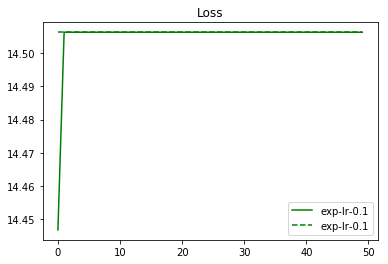

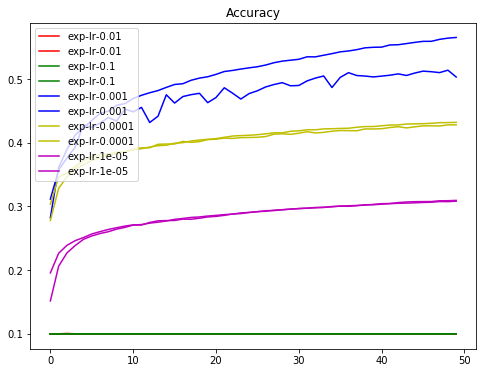

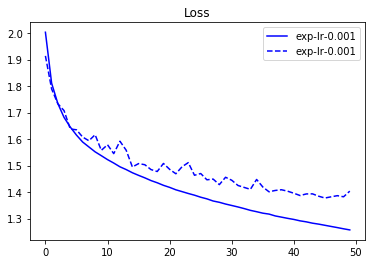

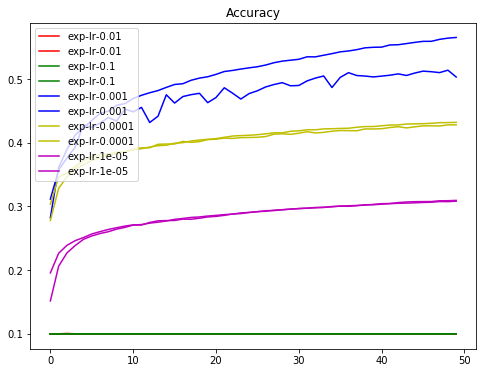

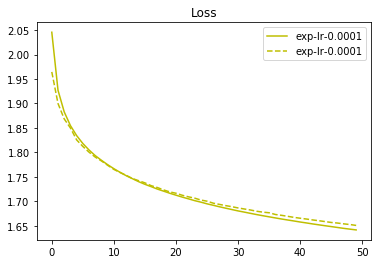

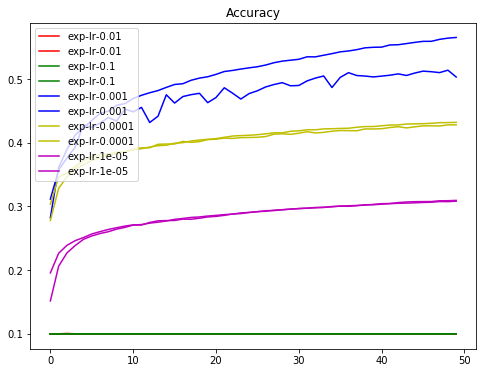

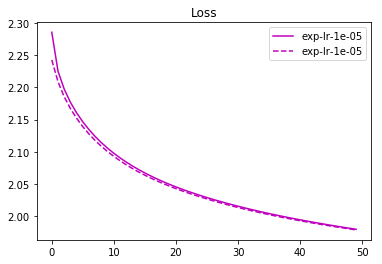

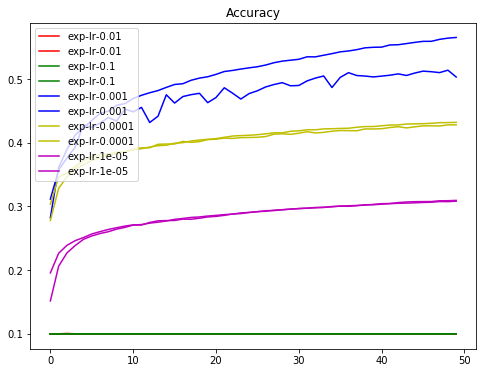

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label = cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '-', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

# Adam

In [17]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr = lr)
    model.compile(loss="categorical_crossentropy", metrics = ["accuracy"], optimizer = optimizer)
    
    model.fit(x_train, y_train,
              epochs = EPOCHS,
              batch_size = BATCH_SIZE,
              validation_data = (x_test, y_test),
              shuffle = True)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = 'exp-lr-%s' % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 52us/step - loss: 14.4376 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 3s 54us/step - loss: 1.9117 - acc: 0.3083 - val_loss: 1.7765 - val_acc: 0.3607
Epoch 2/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6927 - acc: 0.3955 - val_loss: 1.6697 - val_acc: 0.4109
Epoch 3/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6085 - acc: 0.4248 - val_loss: 1.5903 - val_acc: 0.4292
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5474 - acc: 0.4499 - val_loss: 1.5457 - val_acc: 0.4502
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4947 - acc: 0.4682 - val_loss: 1.4993 - val_acc: 0.4721
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4620 - acc: 0.4778 - val_loss: 1.5031 - val_acc: 0.4671
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4247 - acc: 0.4920 - val_loss: 1.4499 - val_acc: 0.4861
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6270 - acc: 0.4256 - val_loss: 1.6003 - val_acc: 0.4324
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5711 - acc: 0.4466 - val_loss: 1.5829 - val_acc: 0.4318
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5303 - acc: 0.4620 - val_loss: 1.5671 - val_acc: 0.4442
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4937 - acc: 0.4729 - val_loss: 1.5046 - val_acc: 0.4701
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4566 - acc: 0.4877 - val_loss: 1.4776 - val_acc: 0.4785
Epoch 8/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4328 - acc: 0.4958 - val_loss: 1.4750 - val_acc: 0.4793
Epoch 9/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4043 - acc: 0.5061 - val_loss: 1.4533 - val_acc: 0.4830
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 2s 44us/step - loss: 1.8031 - acc: 0.3732 - val_loss: 1.7869 - val_acc: 0.3805
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7684 - acc: 0.3857 - val_loss: 1.7594 - val_acc: 0.3892
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7403 - acc: 0.3967 - val_loss: 1.7345 - val_acc: 0.3926
Epoch 7/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7162 - acc: 0.4034 - val_loss: 1.7120 - val_acc: 0.4002
Epoch 8/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6943 - acc: 0.4103 - val_loss: 1.6913 - val_acc: 0.4116
Epoch 9/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6750 - acc: 0.4182 - val_loss: 1.6738 - val_acc: 0.4156
Epoch 10/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6585 - acc: 0.4223 - val_loss: 1.6580 - val_acc: 0.4226
Epoch 11/50
50000/50000 [==========================

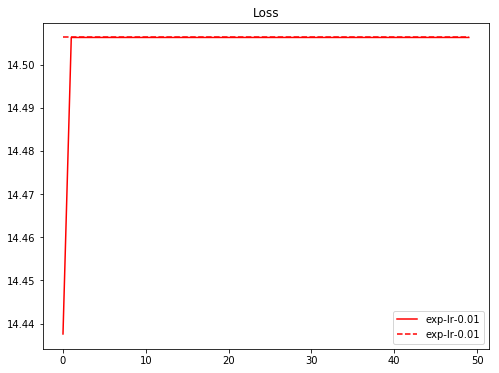

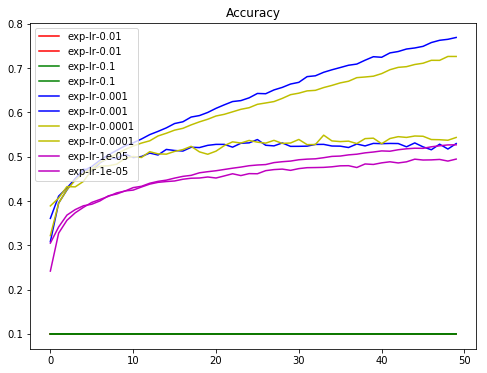

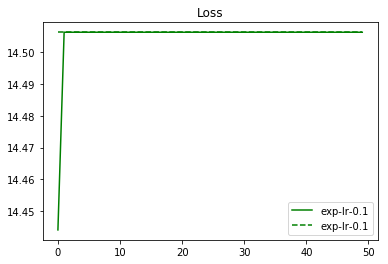

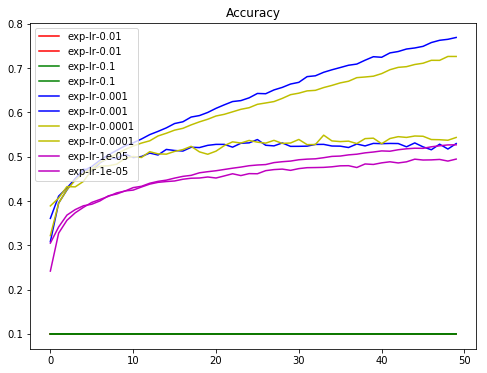

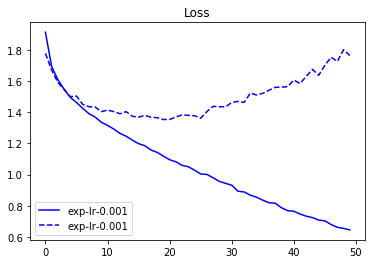

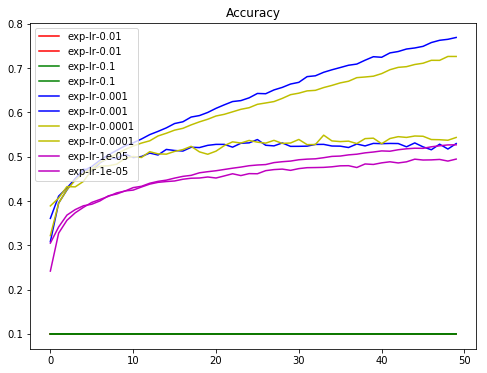

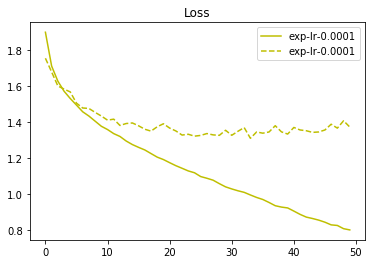

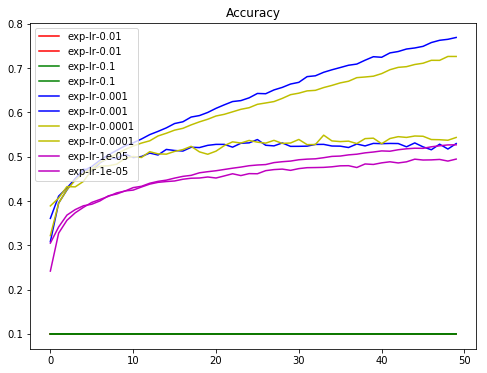

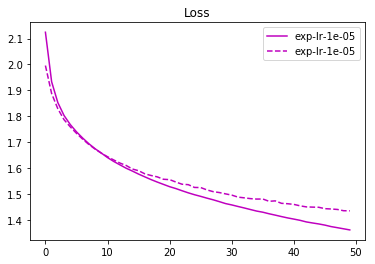

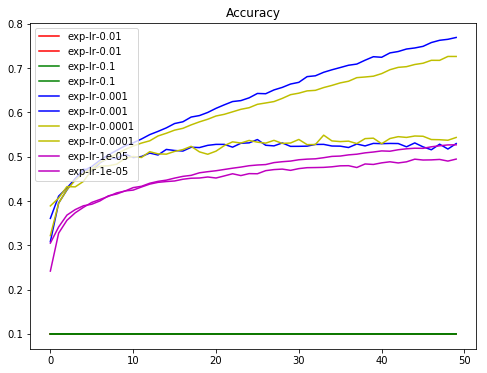

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label = cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '-', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()